# Problem 1
### Supervised Classification Libraries: Regression, Decision Tree

6 Runs of Supervised Training / Testing : 3 datasets (MNIST, Spambase, 20NG) x 2 Classification Algorithms (L2-reg Logistic Regression, Decision Trees). You can use a library for the classification algorithms, and also can use any library/script to process data in appropriate formats.

You are required to explain/analyze the model trained in terms of features : for each of the 6 runs list the top F=30 features. For the Regression these correspond to the highest-absolute-value F coefficients; for Decision Tree they are the first F splits. In particular for Decision Tree on 20NG, report performance for two tree sizes ( by depths of the tree, or number of leaves, or number of splits )

In [1]:
import tensorflow as tf
import numpy as np
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [2]:
def load_mnist():
    num_classes = 10
    input_shape = (28, 28, 1)
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Scale images to the [0, 1] range
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
    
    
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    return X_train, y_train, X_test, y_test

In [3]:
def load_spambase():
    path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 3A/spambase/spambase.data"
    data = np.loadtxt(path, delimiter=",")
    
    # separate the features and labels
    X = data[:, :-1]
    y = data[:, -1]
    
    # normalize the features
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
    
    return X_train, y_train, X_test, y_test

In [4]:
def load_20ng():
    X_train, y_train = fetch_20newsgroups_vectorized(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    X_test, y_test = fetch_20newsgroups_vectorized(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    
    return X_train, y_train, X_test, y_test

In [5]:
def load_fashion():
    num_classes = 10
    input_shape = (28, 28, 1)
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    # Scale images to the [0, 1] range
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)
    
    #y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    #y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    
    return X_train, y_train, X_test, y_test

In [6]:
def get_top_F(model, F):
    coefs=model.coef_[0]
    top_F = np.argpartition(coefs, -F)[-F:]
    top_F_sorted=top_F[np.argsort(coefs[top_F])]
    return top_F_sorted

###### Logistic Regression on MNIST Dataset

In [7]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
X_train, y_train, X_test, y_test = load_mnist()

mnist_LR = model.fit(X_train, y_train) #0.9201

In [8]:
print("Top 30 feature indices: ")
print(get_top_F(mnist_LR, 30))

Top 30 feature indices: 
[513 127 453 125 303 404 262 236 482 374 271 360 444 189 265 544 150 427
 370 298 213 368 399 498 240 430  44 397 302 629]


In [9]:
print(f"Converged in {mnist_LR.n_iter_[0]} iterations")

Converged in 13 iterations


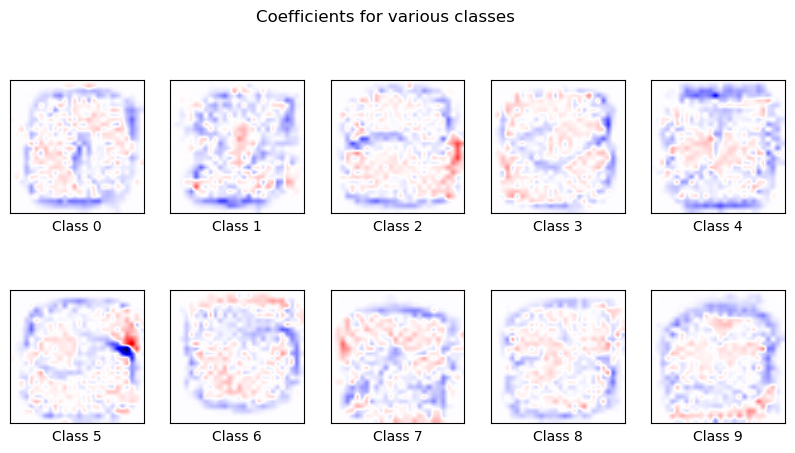

In [10]:
coef = mnist_LR.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.seismic,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [11]:
y_pred = mnist_LR.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion Matrix: 
[[ 960    0    1    2    0    5    6    3    1    2]
 [   0 1112    3    1    0    1    5    1   12    0]
 [   8    8  920   20    9    5   10   11   37    4]
 [   4    0   17  919    2   22    4   1

###### Logistic Regression on Spambase Dataset

In [12]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
X_train, y_train, X_test, y_test = load_spambase()

spam_LR = model.fit(X_train, y_train) #0.9201

In [13]:
print("Top 30 feature indices: ")
print(get_top_F(spam_LR, 30))

Top 30 feature indices: 
[ 0 12 33 36 13 17  9  2  5  8 23 18  7 27 51 21 20  4 14 16 35 19 56 15
 55  3  6 53 22 52]


In [14]:
print(f"Converged in {spam_LR.n_iter_} iterations")

Converged in [8] iterations


In [15]:
y_pred = spam_LR.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       531
         1.0       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix: 
[[506  25]
 [ 50 340]]


###### Logistic Regression on 20NG Dataset

In [16]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 1000)
X_train, y_train, X_test, y_test = load_20ng()

ng_LR = model.fit(X_train, y_train)

In [17]:
print("Top 30 feature indices: ")
print(get_top_F(ng_LR, 30))

Top 30 feature indices: 
[ 22219  22263  70632  26892  67377  34763  74124  53880 100208  34601
  66511  63092  64177  80633  18408  96391  63096  20166  77280  22698
  83666  88519  51199  32658  23451  20169  51198  43842  20165  77274]


In [70]:
print(f"Converged in {ng_LR.n_iter_[0]} iterations")

Converged in 10 iterations


In [19]:
y_pred = ng_LR.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       319
           1       0.56      0.62      0.59       389
           2       0.61      0.53      0.57       394
           3       0.61      0.53      0.56       392
           4       0.61      0.55      0.58       385
           5       0.65      0.58      0.62       395
           6       0.63      0.78      0.69       390
           7       0.62      0.57      0.59       396
           8       0.56      0.59      0.57       398
           9       0.41      0.66      0.50       397
          10       0.75      0.78      0.77       399
          11       0.67      0.57      0.62       396
          12       0.46      0.44      0.45       393
          13       0.51      0.57      0.54       396
          14       0.62      0.62      0.62       394
          15       0.53      0.72      0.61       398
          16       0.47      0.55      0.51       364
    

###### Decision Tree Classifier on MNIST Dataset
No Max Depth

In [20]:
model = tree.DecisionTreeClassifier(random_state = 123, max_depth = None)
X_train, y_train, X_test, y_test = load_mnist()
y_train = y_train.astype('int')
y_test = y_test.astype('int')

mnist_tree1 = model.fit(X_train, y_train)

In [21]:
y_pred = mnist_tree1.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.82      0.85      0.84      1010
           4       0.88      0.87      0.87       982
           5       0.84      0.83      0.84       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.81      0.82      0.81       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix: 
[[ 917    0    7    6    6    8   16    5   11    4]
 [   3 1088   11    5    2    9    6    1    9    1]
 [  11    6  885   37   13   14   12   25   23    6]
 [   8    3   34  861    5   43    3    

In [22]:
F = 30
print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(mnist_tree1.feature_importances_))[0:F]
top_F

Top 30 feature indices: 


array([489, 435, 568, 350, 430, 211, 346, 405, 234, 156,  98, 484, 486,
       290, 354, 655, 402, 153, 155, 271, 101, 381, 658, 348, 296, 267,
       297, 514,  95, 300], dtype=int64)

Branches: 
|--- feature_350 <= 0.52
|   |--- feature_568 <= 0.00
|   |   |--- feature_430 <= 0.00
|   |   |   |--- feature_405 <= 0.01
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- feature_405 >  0.01
|   |   |   |   |--- truncated branch of depth 20
|   |   |--- feature_430 >  0.00
|   |   |   |--- feature_211 <= 0.11
|   |   |   |   |--- truncated branch of depth 47
|   |   |   |--- feature_211 >  0.11
|   |   |   |   |--- truncated branch of depth 38
|   |--- feature_568 >  0.00
|   |   |--- feature_435 <= 0.00
|   |   |   |--- feature_489 <= 0.09
|   |   |   |   |--- truncated branch of depth 33
|   |   |   |--- feature_489 >  0.09
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- feature_435 >  0.00
|   |   |   |--- feature_346 <= 0.00
|   |   |   |   |--- truncated branch of depth 24
|   |   |   |--- feature_346 >  0.00
|   |   |   |   |--- truncated branch of depth 19
|--- feature_350 >  0.52
|   |--- feature_489 <= 0.10
|   |   |--- feature_290

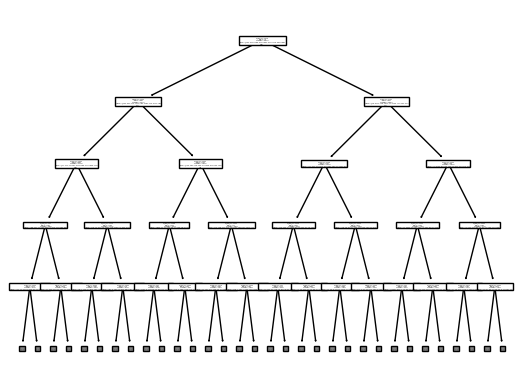

In [23]:
print("Branches: ")
text_representation = tree.export_text(mnist_tree1, max_depth = 3)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(mnist_tree1, max_depth = 4)

###### Decision Tree Classifier on MNIST Dataset
Max Leaves = 30

In [24]:
model = tree.DecisionTreeClassifier(random_state = 123, max_leaf_nodes = 30)
X_train, y_train, X_test, y_test = load_mnist()
y_train = y_train.astype('int')
y_test = y_test.astype('int')

mnist_tree2 = model.fit(X_train, y_train)

In [25]:
y_pred = mnist_tree2.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       980
           1       0.94      0.81      0.87      1135
           2       0.68      0.64      0.66      1032
           3       0.75      0.61      0.68      1010
           4       0.68      0.69      0.68       982
           5       0.61      0.45      0.52       892
           6       0.70      0.63      0.66       958
           7       0.85      0.78      0.81      1028
           8       0.41      0.63      0.50       974
           9       0.53      0.74      0.62      1009

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.71      0.68      0.69     10000

Confusion Matrix: 
[[759   0  45   2  49  21   9  18  17  60]
 [  2 916  40  50   0   1  23   6  97   0]
 [ 13  17 665   9  22  30  52  19 185  20]
 [ 22   2  48 621  22  26  19   6 141 103]
 [  1   3   6  11 675  34  

In [26]:
print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(mnist_tree2.feature_importances_))[0:F]
top_F

Top 30 feature indices: 


array([489, 435, 350, 568, 430, 211, 346, 234, 405,  98, 156, 290, 484,
       655, 402, 354, 101, 486, 153, 271, 381, 348, 155, 267,  95, 297,
       149, 300, 219, 264], dtype=int64)

Branches: 
|--- feature_350 <= 0.52
|   |--- feature_568 <= 0.00
|   |   |--- feature_430 <= 0.00
|   |   |   |--- feature_405 <= 0.01
|   |   |   |   |--- feature_484 <= 0.00
|   |   |   |   |   |--- feature_153 <= 0.00
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_153 >  0.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_484 >  0.00
|   |   |   |   |   |--- class: 9
|   |   |   |--- feature_405 >  0.01
|   |   |   |   |--- class: 8
|   |   |--- feature_430 >  0.00
|   |   |   |--- feature_211 <= 0.11
|   |   |   |   |--- feature_98 <= 0.00
|   |   |   |   |   |--- feature_267 <= 0.48
|   |   |   |   |   |   |--- feature_95 <= 0.03
|   |   |   |   |   |   |   |--- feature_155 <= 0.31
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_155 >  0.31
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_95 >  0.03
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- 

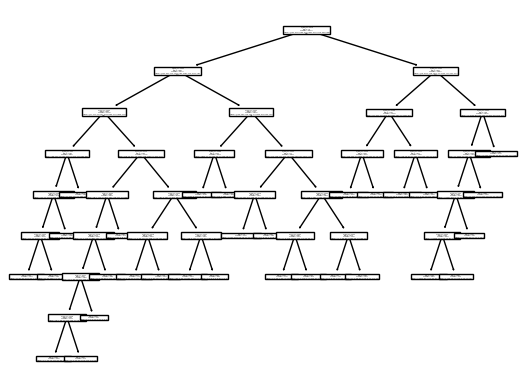

In [27]:
print("Branches: ")
text_representation = tree.export_text(mnist_tree2)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(mnist_tree2)

###### Decision Tree Classifier on SpamBase Dataset
No Max Depth

In [28]:
model = tree.DecisionTreeClassifier(random_state = 123, max_depth = None)
X_train, y_train, X_test, y_test = load_spambase()
y_train = y_train.astype('int')
y_test = y_test.astype('int')
spam_tree1 = model.fit(X_train, y_train)

print(f"Training Score: {spam_tree1.score(X_train, y_train)}")
print(f"Test Score: {spam_tree1.score(X_test, y_test)}")

y_pred = spam_tree1.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(spam_tree1.feature_importances_))[0:F]
top_F

Training Score: 0.9994565217391305
Test Score: 0.9120521172638436
Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.91      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix: 
[[496  35]
 [ 46 344]]
Top 30 feature indices: 


array([52,  6, 51, 54, 24, 15, 55, 26, 56, 18, 45,  4, 11, 16, 17, 23, 20,
       34,  7, 35,  9, 48, 44, 10, 38,  8, 12,  0, 13, 41], dtype=int64)

Branches: 
|--- feature_52 <= -0.08
|   |--- feature_6 <= -0.13
|   |   |--- feature_51 <= -0.02
|   |   |   |--- feature_15 <= -0.25
|   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- feature_15 >  -0.25
|   |   |   |   |--- truncated branch of depth 14
|   |   |--- feature_51 >  -0.02
|   |   |   |--- feature_54 <= -0.08
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- feature_54 >  -0.08
|   |   |   |   |--- truncated branch of depth 14
|   |--- feature_6 >  -0.13
|   |   |--- feature_26 <= -0.18
|   |   |   |--- feature_45 <= -0.07
|   |   |   |   |--- truncated branch of depth 9
|   |   |   |--- feature_45 >  -0.07
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- feature_26 >  -0.18
|   |   |   |--- class: 0
|--- feature_52 >  -0.08
|   |--- feature_24 <= -0.09
|   |   |--- feature_55 <= -0.23
|   |   |   |--- feature_6 <= 1.01
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_6 >  1.01
|   |   |   |   |--- cla

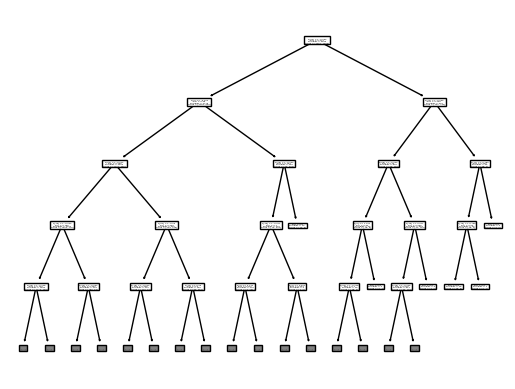

In [29]:
print("Branches: ")
text_representation = tree.export_text(spam_tree1, max_depth = 3)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(spam_tree1, max_depth = 4)

###### Decision Tree Classifier on SpamBase Dataset
Max Leaves = 30

In [30]:
model = tree.DecisionTreeClassifier(random_state = 123, max_leaf_nodes = 30)
X_train, y_train, X_test, y_test = load_spambase()
y_train = y_train.astype('int')
y_test = y_test.astype('int')
spam_tree2 = model.fit(X_train, y_train)

y_pred = spam_tree2.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print(f"Training Score: {spam_tree2.score(X_train, y_train)}")
print(f"Test Score: {spam_tree2.score(X_test, y_test)}")

print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(spam_tree2.feature_importances_))[0:F]
top_F

Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       531
           1       0.93      0.86      0.89       390

    accuracy                           0.91       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix: 
[[507  24]
 [ 56 334]]
Training Score: 0.9426630434782609
Test Score: 0.9131378935939196
Top 30 feature indices: 


array([52,  6, 51, 24, 54, 15, 26, 55, 45, 16, 34,  4, 17, 23, 38,  8, 48,
       56,  7, 11, 22, 12, 13, 14, 10,  9,  5, 18, 19,  3], dtype=int64)

Branches: 
|--- feature_52 <= -0.08
|   |--- feature_6 <= -0.13
|   |   |--- feature_51 <= -0.02
|   |   |   |--- feature_15 <= -0.25
|   |   |   |   |--- feature_23 <= -0.17
|   |   |   |   |   |--- feature_54 <= 0.49
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_54 >  0.49
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_23 >  -0.17
|   |   |   |   |   |--- feature_55 <= -0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_55 >  -0.08
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  -0.25
|   |   |   |   |--- feature_24 <= -0.28
|   |   |   |   |   |--- feature_4 <= -0.45
|   |   |   |   |   |   |--- feature_48 <= 0.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_48 >  0.01
|   |   |   |   |   |   |   |--- feature_56 <= -0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_56 >  -0.35
|   |   |   |   |   |   |   |   |--- class

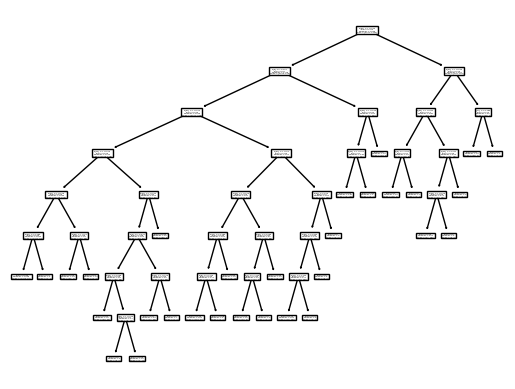

In [31]:
print("Branches: ")
text_representation = tree.export_text(spam_tree2)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(spam_tree2)

###### Decision Tree Classifier on 20 NewsGroups Dataset
No Max Depth

In [32]:
model = tree.DecisionTreeClassifier(random_state = 123, max_depth = None)
X_train, y_train, X_test, y_test = load_20ng()
y_train = y_train.astype('int')
y_test = y_test.astype('int')
ng_tree1 = model.fit(X_train, y_train)

y_pred = ng_tree1.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print(f"Training Score: {ng_tree1.score(X_train, y_train)}")
print(f"Test Score: {ng_tree1.score(X_test, y_test)}")

print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(ng_tree1.feature_importances_))[0:F]
top_F

Classification Report 
              precision    recall  f1-score   support

           0       0.26      0.23      0.24       319
           1       0.38      0.41      0.40       389
           2       0.42      0.43      0.43       394
           3       0.36      0.32      0.34       392
           4       0.41      0.40      0.41       385
           5       0.52      0.45      0.49       395
           6       0.57      0.57      0.57       390
           7       0.31      0.49      0.38       396
           8       0.47      0.49      0.48       398
           9       0.44      0.44      0.44       397
          10       0.57      0.57      0.57       399
          11       0.56      0.47      0.51       396
          12       0.28      0.27      0.28       393
          13       0.40      0.38      0.39       396
          14       0.49      0.48      0.49       394
          15       0.42      0.44      0.43       398
          16       0.36      0.37      0.36       364
    

array([43842, 80294, 96760, 37182, 22778, 25775, 51260, 84097, 47021,
       51326, 44820, 89360, 88532, 67670, 96751, 58921, 18521, 88519,
       87968, 19583, 27925, 49447, 41127, 44002, 44261, 51136, 19122,
       96917, 63238, 88767], dtype=int64)

Branches: 
|--- feature_43842 <= 0.01
|   |--- feature_37182 <= 0.00
|   |   |--- feature_22778 <= 0.01
|   |   |   |--- feature_80294 <= 0.02
|   |   |   |   |--- truncated branch of depth 341
|   |   |   |--- feature_80294 >  0.02
|   |   |   |   |--- truncated branch of depth 20
|   |   |--- feature_22778 >  0.01
|   |   |   |--- feature_80294 <= 0.08
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- feature_80294 >  0.08
|   |   |   |   |--- truncated branch of depth 2
|   |--- feature_37182 >  0.00
|   |   |--- feature_41665 <= 0.03
|   |   |   |--- feature_49529 <= 0.03
|   |   |   |   |--- class: 11
|   |   |   |--- feature_49529 >  0.03
|   |   |   |   |--- class: 17
|   |   |--- feature_41665 >  0.03
|   |   |   |--- class: 12
|--- feature_43842 >  0.01
|   |--- feature_20165 <= 0.00
|   |   |--- feature_19756 <= 0.01
|   |   |   |--- feature_46789 <= 0.01
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- feature_46789 >  0.01
|   |   |   |   |

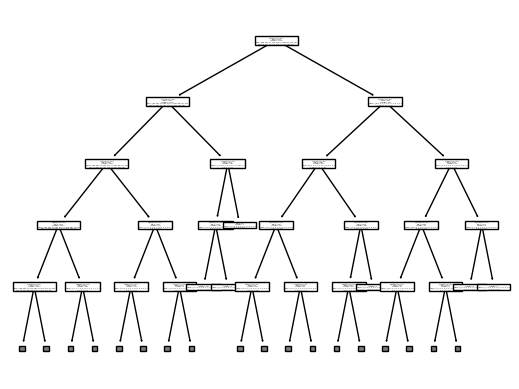

In [33]:
print("Branches: ")
text_representation = tree.export_text(ng_tree1, max_depth = 3)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(ng_tree1, max_depth = 4)

###### Decision Tree Classifier on 20 NewsGroups Dataset
Max Leaves = 30

In [34]:
model = tree.DecisionTreeClassifier(random_state = 123, max_leaf_nodes = 30)
X_train, y_train, X_test, y_test = load_20ng()
y_train = y_train.astype('int')
y_test = y_test.astype('int')
ng_tree2 = model.fit(X_train, y_train)

y_pred = ng_tree2.predict(X_test)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print(f"Training Score: {ng_tree2.score(X_train, y_train)}")
print(f"Test Score: {ng_tree2.score(X_test, y_test)}")

print("Top 30 feature indices: ")
top_F = np.flip(np.argsort(ng_tree2.feature_importances_))[0:F]
top_F

Classification Report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.71      0.23      0.34       389
           2       0.59      0.47      0.53       394
           3       0.80      0.09      0.16       392
           4       0.63      0.36      0.46       385
           5       0.68      0.21      0.31       395
           6       0.80      0.45      0.58       390
           7       0.78      0.31      0.44       396
           8       0.93      0.26      0.41       398
           9       0.80      0.13      0.23       397
          10       0.61      0.59      0.60       399
          11       0.94      0.37      0.53       396
          12       0.08      0.89      0.14       393
          13       0.84      0.19      0.32       396
          14       0.64      0.29      0.40       394
          15       0.46      0.47      0.46       398
          16       0.55      0.16      0.24       364
    

C:\Users\chase\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chase\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chase\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([43842, 96760, 37182, 22778, 80294, 51260, 25775, 84097, 47021,
       44820, 58921, 87968, 19585, 96751, 27925, 44002, 44261, 19122,
       48648, 21724, 63238, 34023, 66739, 82262, 42595, 34638, 27479,
       52157, 44066, 33871], dtype=int64)

Branches: 
|--- feature_43842 <= 0.01
|   |--- feature_37182 <= 0.00
|   |   |--- feature_22778 <= 0.01
|   |   |   |--- feature_80294 <= 0.02
|   |   |   |   |--- feature_96760 <= 0.04
|   |   |   |   |   |--- feature_51260 <= 0.00
|   |   |   |   |   |   |--- feature_25775 <= 0.04
|   |   |   |   |   |   |   |--- feature_84097 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_47021 <= 0.00
|   |   |   |   |   |   |   |   |   |--- feature_44820 <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- feature_58921 <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 334
|   |   |   |   |   |   |   |   |   |   |--- feature_58921 >  0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |--- feature_44820 >  0.01
|   |   |   |   |   |   |   |   |   |   |--- feature_61840 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   

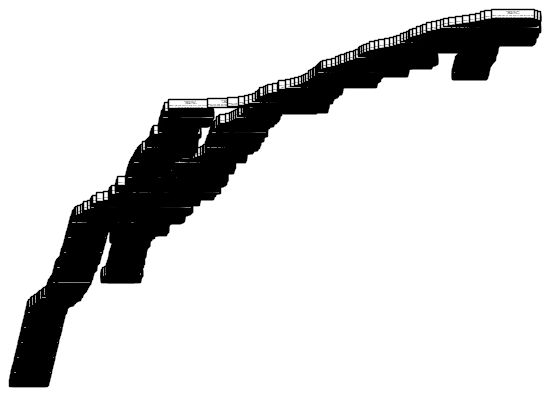

In [35]:
print("Branches: ")
text_representation = tree.export_text(ng_tree1)
print(text_representation)

print("Tree: ")
tree_dia = plot_tree(ng_tree1)

# Problem 2
### PCA library on MNIST
A) For MNIST dataset, run a PCA-library to get data on D=5 features. Rerun the classification tasks from PB1, compare testing performance with the one from PB1. Then repeat this exercise for D=20

In [36]:
from sklearn.decomposition import PCA

In [37]:
D = 5
X_train, y_train, X_test, y_test = load_mnist()

pca = PCA(n_components = D)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
mnist_LR_pca = model.fit(X_train_pca, y_train) #0.9201

In [39]:
print(f"Training Score: {mnist_LR_pca.score(X_train_pca, y_train)}")
print(f"Test Score: {mnist_LR_pca.score(X_test_pca, y_test)}")

Training Score: 0.6434833333333333
Test Score: 0.6526


In [40]:
print(f"Converged in {mnist_LR_pca.n_iter_[0]} iterations")

Converged in 7 iterations


In [41]:
y_pred = mnist_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       980
           1       0.84      0.95      0.89      1135
           2       0.63      0.50      0.56      1032
           3       0.57      0.74      0.64      1010
           4       0.59      0.62      0.61       982
           5       0.65      0.28      0.39       892
           6       0.59      0.63      0.61       958
           7       0.68      0.75      0.71      1028
           8       0.58      0.58      0.58       974
           9       0.53      0.47      0.50      1009

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.63     10000
weighted avg       0.65      0.65      0.64     10000

Confusion Matrix: 
[[ 902    0    5    3    0   30   13    2   25    0]
 [   0 1078   22    9    0    1    2    3   14    6]
 [  51   45  520   64   38   13  238    4   53    6]
 [  17   23   34  750    4   34    5    

In [42]:
D = 20
X_train, y_train, X_test, y_test = load_mnist()

pca = PCA(n_components = D)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
mnist_LR_pca = model.fit(X_train_pca, y_train) #0.9201

print(f"Training Score: {mnist_LR_pca.score(X_train_pca, y_train)}")
print(f"Test Score: {mnist_LR_pca.score(X_test_pca, y_test)}")

print(f"Converged in {mnist_LR_pca.n_iter_[0]} iterations")

y_pred = mnist_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.8600666666666666
Test Score: 0.868
Converged in 9 iterations
Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.94      0.97      0.96      1135
           2       0.87      0.82      0.84      1032
           3       0.83      0.86      0.85      1010
           4       0.85      0.88      0.87       982
           5       0.80      0.76      0.78       892
           6       0.90      0.92      0.91       958
           7       0.90      0.89      0.89      1028
           8       0.82      0.80      0.81       974
           9       0.83      0.79      0.81      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix: 
[[ 948    0    4    3    1   10    8    1    5    0]
 [   0 1100    3    2    0    3    4    1   22    0]
 [  14   16  8

### B)
Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimensions) you need to get a comparable test result?

In [43]:
D = 5
X_train, y_train, X_test, y_test = load_spambase()

pca = PCA(n_components = D)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)

spam_LR_pca = model.fit(X_train_pca, y_train)

In [44]:
print(f"Training Score: {spam_LR_pca.score(X_train_pca, y_train)}")
print(f"Test Score: {spam_LR_pca.score(X_test_pca, y_test)}")

print(f"Converged in {spam_LR_pca.n_iter_[0]} iterations")

y_pred = spam_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Training Score: 0.8760869565217392
Test Score: 0.8773072747014115
Converged in 7 iterations
Classification Report 
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       531
         1.0       0.90      0.79      0.85       390

    accuracy                           0.88       921
   macro avg       0.88      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921

Confusion Matrix: 
[[498  33]
 [ 80 310]]


In [45]:
D = 20
X_train, y_train, X_test, y_test = load_spambase()

pca = PCA(n_components = D)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)

spam_LR_pca = model.fit(X_train_pca, y_train)

# print(f"Training Score: {spam_LR_pca.score(X_train_pca, y_train)}")
# print(f"Test Score: {spam_LR_pca.score(X_test_pca, y_test)}")

print(f"Converged in {spam_LR_pca.n_iter_[0]} iterations")

y_pred = spam_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Converged in 7 iterations
Classification Report 
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       531
         1.0       0.93      0.84      0.88       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix: 
[[507  24]
 [ 62 328]]


In [46]:
D = 50
X_train, y_train, X_test, y_test = load_spambase()

pca = PCA(n_components = D)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)

spam_LR_pca = model.fit(X_train_pca, y_train)

print(f"Converged in {spam_LR_pca.n_iter_[0]} iterations")

y_pred = spam_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Converged in 8 iterations
Classification Report 
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       531
         1.0       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix: 
[[505  26]
 [ 51 339]]


With PCA at D = 50, our test Score of .916 now is roughly equal to our non-pca test score of .918, and our accuracy of .92 is equal to the non-pca accuracy, though, at D=20 above, we were also quite close.

# Problem 3
### Implement PCA on MNIST
Repeat PB2 exercises on MNIST (D=5 and D=20) with your own PCA implementation. You can use any built-in library/package/API for : matrix storage/multiplication, covariance computation, eigenvalue or SVD decomposition, etc. Matlab is probably the easiest language for implementing PCA due to its excellent linear algebra support.

In [47]:
class scratch_pca:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):    
        mean = np.mean(X, axis = 0)
        X = X - mean

        cov_mat = np.cov(X, rowvar = False)
        e_vals, e_vects = np.linalg.eigh(cov_mat)

        #Sort eigenvalues and eigenvectors
        sort_index = np.argsort(e_vals)[::-1]
        sorted_e_vals = e_vals[sort_index]
        sorted_e_vects = e_vects[:,sort_index]

        #Subset based on selected # components
        self.subset = sorted_e_vects[:,0:self.n_components]

        self.X_reduction = np.dot(self.subset.transpose(), X.transpose()). transpose()

        return self
    
    def transform(self, X):
        X = X.copy()
        X_std = X - np.mean(X, axis = 0)
        X_proj = X_std.dot(self.subset)
        
        return X_proj

In [48]:
D = 5
X_train, y_train, X_test, y_test = load_mnist()

pca = scratch_pca(n_components = D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

In [49]:
model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
mnist_LR_pca = model.fit(X_train_pca, y_train) #0.9201

print(f"Converged in {mnist_LR_pca.n_iter_[0]} iterations")

y_pred = mnist_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Converged in 7 iterations
Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       980
           1       0.81      0.96      0.88      1135
           2       0.64      0.49      0.56      1032
           3       0.58      0.74      0.65      1010
           4       0.60      0.63      0.61       982
           5       0.62      0.28      0.39       892
           6       0.60      0.64      0.62       958
           7       0.66      0.77      0.71      1028
           8       0.58      0.57      0.58       974
           9       0.54      0.44      0.49      1009

    accuracy                           0.65     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.65      0.65      0.64     10000

Confusion Matrix: 
[[ 906    0    3    3    0   32   11    2   23    0]
 [   0 1084   19    8    0    3    2    1   13    5]
 [  54   53  509   61   37   14  245    5   50    4]
 [  18   25   

In [50]:
D = 20
X_train, y_train, X_test, y_test = load_mnist()

pca = scratch_pca(n_components = D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

model = LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 123, max_iter = 100)
mnist_LR_pca = model.fit(X_train_pca, y_train) #0.9201

print(f"Converged in {mnist_LR_pca.n_iter_[0]} iterations")

y_pred = mnist_LR_pca.predict(X_test_pca)
print("Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Converged in 9 iterations
Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.94      0.97      0.95      1135
           2       0.88      0.81      0.84      1032
           3       0.83      0.87      0.85      1010
           4       0.84      0.89      0.86       982
           5       0.80      0.77      0.78       892
           6       0.90      0.91      0.91       958
           7       0.90      0.89      0.89      1028
           8       0.83      0.79      0.81       974
           9       0.82      0.79      0.81      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix: 
[[ 949    0    3    3    1   10    8    1    5    0]
 [   0 1103    3    2    0    3    4    1   19    0]
 [  14   19  838   28   16    7   28   20   44   18]
 [   5    1   

# Problem 4
### PCA for cluster visualization
A) Run KMeans on MNIST data (or a sample of it)

In [51]:
X_train, y_train, X_test, y_test = load_mnist()
kmeans = KMeans(n_clusters=10, random_state=123, n_init="auto").fit(X_train)

In [52]:
y_pred = kmeans.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.56      0.41      0.48      1135
           2       0.01      0.01      0.01      1032
           3       0.01      0.01      0.01      1010
           4       0.00      0.00      0.00       982
           5       0.23      0.29      0.26       892
           6       0.53      0.84      0.65       958
           7       0.04      0.03      0.04      1028
           8       0.16      0.23      0.19       974
           9       0.02      0.01      0.01      1009

    accuracy                           0.18     10000
   macro avg       0.16      0.18      0.16     10000
weighted avg       0.16      0.18      0.16     10000



B) Run PCA on same data

In [54]:
D = 3
pca = scratch_pca(D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

kmeans = KMeans(n_clusters=10, random_state=123, n_init="auto").fit(X_test_pca)
y_pred = kmeans.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.39      0.28      0.33      1032
           3       0.00      0.00      0.00      1010
           4       0.05      0.06      0.05       982
           5       0.19      0.22      0.20       892
           6       0.33      0.34      0.34       958
           7       0.04      0.05      0.04      1028
           8       0.03      0.03      0.03       974
           9       0.01      0.01      0.01      1009

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



C) Plot data in 3D with PCA representation with t=3 top eigen values; use shapes to to indicate truth digit label (circle, triangle, "+", stars, etc) and colors to indicate cluster ID (red blue green etc).

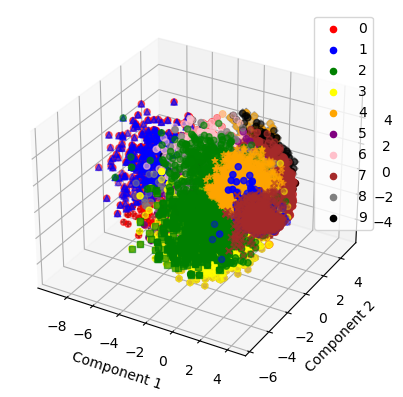

In [55]:
# %matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
shapes = ['o', '^', 's', 'p', '*', 'h', 'H', 'x', 'D', '+']
for i in range(10):
    ax.scatter(X_test_pca[(y_test == i), 0], X_test_pca[(y_test == i), 1], X_test_pca[(y_test == i), 2], c=colors[i], label=str(i))
for i in range(10):
    ax.scatter(X_test_pca[(y_pred == i), 0], X_test_pca[(y_pred == i), 1], X_test_pca[(y_pred == i), 2], c=colors[i], marker=shapes[i])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()

plt.ion()
plt.show()

D) Select other 3 at random eigen values from top 20; redo the plot several times.

In [56]:
D = 20
pca = scratch_pca(D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

random_dims = np.random.choice(20, size=3, replace=False)
X_test_pca_random = X_test_pca[:, random_dims]

kmeans = KMeans(n_clusters=10, random_state=123, n_init="auto").fit(X_test_pca_random)
y_pred = kmeans.predict(X_test_pca_random)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.17      0.15       980
           1       0.00      0.00      0.00      1135
           2       0.16      0.18      0.17      1032
           3       0.27      0.26      0.27      1010
           4       0.24      0.20      0.21       982
           5       0.20      0.15      0.17       892
           6       0.06      0.06      0.06       958
           7       0.31      0.29      0.30      1028
           8       0.10      0.10      0.10       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.14     10000
   macro avg       0.15      0.14      0.14     10000
weighted avg       0.14      0.14      0.14     10000



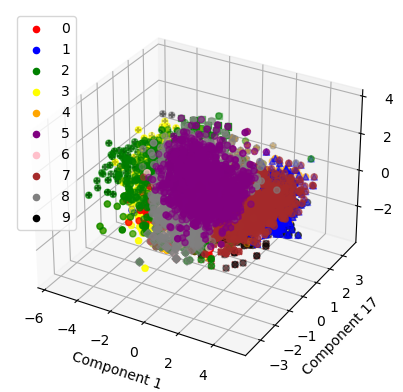

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
shapes = ['o', '^', 's', 'p', '*', 'h', 'H', 'x', 'D', '+']
for i in range(10):
    ax.scatter(X_test_pca_random[(y_test == i), 0], X_test_pca_random[(y_test == i), 1], X_test_pca_random[(y_test == i), 2], c=colors[i], label=str(i))
for i in range(10):
    ax.scatter(X_test_pca_random[(y_pred == i), 0], X_test_pca_random[(y_pred == i), 1], X_test_pca_random[(y_pred == i), 2], c=colors[i], marker=shapes[i])
ax.set_xlabel('Component {}'.format(random_dims[0]))
ax.set_ylabel('Component {}'.format(random_dims[1]))
ax.set_zlabel('Component {}'.format(random_dims[2]))
plt.legend()

plt.ion()
plt.show()

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       980
           1       0.03      0.03      0.03      1135
           2       0.27      0.27      0.27      1032
           3       0.12      0.16      0.13      1010
           4       0.04      0.05      0.04       982
           5       0.05      0.03      0.04       892
           6       0.02      0.03      0.02       958
           7       0.06      0.09      0.07      1028
           8       0.38      0.26      0.31       974
           9       0.18      0.18      0.18      1009

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.12     10000
weighted avg       0.12      0.12      0.12     10000



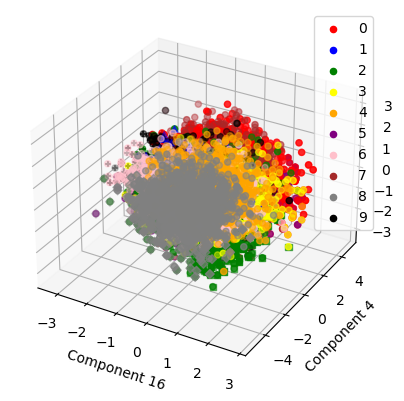

In [58]:
D = 20
pca = scratch_pca(D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

random_dims = np.random.choice(20, size=3, replace=False)
X_test_pca_random = X_test_pca[:, random_dims]

kmeans = KMeans(n_clusters=10, random_state=123, n_init="auto").fit(X_test_pca_random)
y_pred = kmeans.predict(X_test_pca_random)

print(classification_report(y_test, y_pred))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
shapes = ['o', '^', 's', 'p', '*', 'h', 'H', 'x', 'D', '+']
for i in range(10):
    ax.scatter(X_test_pca_random[(y_test == i), 0], X_test_pca_random[(y_test == i), 1], X_test_pca_random[(y_test == i), 2], c=colors[i], label=str(i))
for i in range(10):
    ax.scatter(X_test_pca_random[(y_pred == i), 0], X_test_pca_random[(y_pred == i), 1], X_test_pca_random[(y_pred == i), 2], c=colors[i], marker=shapes[i])
ax.set_xlabel('Component {}'.format(random_dims[0]))
ax.set_ylabel('Component {}'.format(random_dims[1]))
ax.set_zlabel('Component {}'.format(random_dims[2]))
plt.legend()

plt.ion()
plt.show()

              precision    recall  f1-score   support

           0       0.14      0.18      0.16       980
           1       0.00      0.00      0.00      1135
           2       0.01      0.02      0.02      1032
           3       0.03      0.03      0.03      1010
           4       0.40      0.47      0.43       982
           5       0.02      0.02      0.02       892
           6       0.01      0.01      0.01       958
           7       0.00      0.00      0.00      1028
           8       0.10      0.09      0.10       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.08     10000
   macro avg       0.07      0.08      0.08     10000
weighted avg       0.07      0.08      0.07     10000



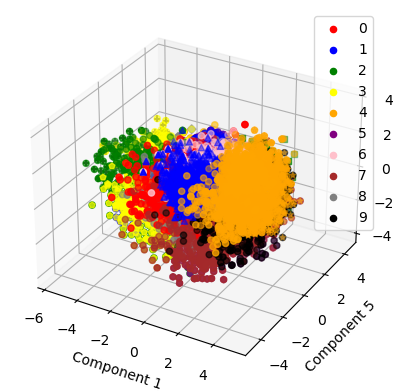

In [59]:
D = 20
pca = scratch_pca(D)
X_train_pca = pca.fit(X_train).X_reduction
X_test_pca = pca.transform(X_test)

random_dims = np.random.choice(20, size=3, replace=False)
X_test_pca_random = X_test_pca[:, random_dims]

kmeans = KMeans(n_clusters=10, random_state=123, n_init="auto").fit(X_test_pca_random)
y_pred = kmeans.predict(X_test_pca_random)

print(classification_report(y_test, y_pred))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
shapes = ['o', '^', 's', 'p', '*', 'h', 'H', 'x', 'D', '+']
for i in range(10):
    ax.scatter(X_test_pca_random[(y_test == i), 0], X_test_pca_random[(y_test == i), 1], X_test_pca_random[(y_test == i), 2], c=colors[i], label=str(i))
for i in range(10):
    ax.scatter(X_test_pca_random[(y_pred == i), 0], X_test_pca_random[(y_pred == i), 1], X_test_pca_random[(y_pred == i), 2], c=colors[i], marker=shapes[i])
ax.set_xlabel('Component {}'.format(random_dims[0]))
ax.set_ylabel('Component {}'.format(random_dims[1]))
ax.set_zlabel('Component {}'.format(random_dims[2]))
plt.legend()

plt.ion()
plt.show()

# Problem 5
Implement Kernel PCA for linear regression

Dataset: 1000 2-dim datapoints TwoSpirals

Dataset: 1000 2-dim datapoints ThreeCircles

A) First, train a Linear Regression (library) and confirm that it doesnt work , i.e. it has a high classification error or high Root Mean Squared Error.


In [60]:
def get_file(path, sep = ','):
    df = pd.DataFrame(pd.read_csv(path, header = None, sep = sep))
    df = df.rename(columns = {0: 'X', 1: 'y', 2: 'label'})
    X = df[['X', 'y']]
    y = df['label']
    return X, y
    

In [61]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 3A/three_circles.txt"
path2 = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 3A/two_spirals.txt"
X, y = get_file(path)

In [62]:
reg = LinearRegression().fit(X, y)

In [63]:
reg.score(X, y)

0.001669351342664993

In [64]:
X, y = get_file(path2, '\t')
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.16071029367398926

B) Run Kernel PCA with Gaussian Kernel to obtain a representation of T features. For reference these steps we demoed in class (Matlab):

In [65]:
# convert X to numpy array
X = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X

# get pairwise squared euclidean distance
X2 = np.sum(X**2, axis=1)
DIST_euclid = np.add.outer(X2, X2) - 2 * np.dot(X, X.T)

# get a kernel matrix NxN
sigma = 3
K = np.exp(-DIST_euclid/sigma)

# normalize the Kernel to correspond to zero-mean
N = K.shape[0]
U = np.ones((N,N))/ N
Kn = K - U @ K - K @ U + U @ K @ U

# obtain kernel eigenvalues, vectors; then sort them with largest eig first
D, V = np.linalg.eigh(Kn)
sorteig = np.argsort(D)[::-1]
D = D[sorteig]
V = V[:, sorteig]

# get the projection matrix
XG = Kn @ V.T

# get first 3 dimensions
X3G = XG[:, :3]

# get first 20 dimensions
X20G = XG[:, :20]

# get first 100 dimensions
X100G = XG[:, :100]


In [66]:
reg1 = LinearRegression().fit(XG, y)
reg1.score(XG,y)

0.999999999842819

In [67]:
reg3 = LinearRegression().fit(X3G, y)
reg3.score(X3G,y)

0.03124988893254521

In [68]:
reg20 = LinearRegression().fit(X20G, y)
reg20.score(X20G,y)

0.7911934518994512

In [69]:
reg100 = LinearRegression().fit(X100G, y)
reg100.score(X100G,y)

0.9890131455494222